Tracy Huynh 
DA320 
Assignment: Midterm Pt 2 - Charts 

In [25]:
import json 
import pymongo
import certifi
import pandas

# Retrieving MongoDB credentials 
with open('/Users/misstacyhuynh/Desktop/Fall 2022/DA320/Secretconnectionstring.json') as f:
    data = json.load(f)
    mongo_connection_string = data['mongodb']

# Fetching the database 
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
print(f"Using MongoDB version {client.server_info()['version']}.")
da320_database = client ['Movies']
metacritic_data = da320_database['Metacritic']
metacritic = pandas.DataFrame(metacritic_data.find())

Using MongoDB version 5.0.13.


In [26]:
# Converting the data into dates and gather year/month
metacritic.release_date = pandas.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.score = pandas.to_numeric(metacritic.score)

metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail,year,month
0,634e392b978295ec0f511f7c,11240,Traffic,2000-12-27,Traffic evokes the high stakes and high risks ...,86,https://static.metacritic.com/images/products/...,2000,12
1,634e392b978295ec0f511f7e,11242,You Can Count on Me,2000-11-10,A young mother (Laura Linney) is cheating on h...,85,https://static.metacritic.com/images/products/...,2000,11
2,634e392b978295ec0f511f86,11250,I'm the One That I Want,2000-07-07,"Set in San Francisco's Warfield Theatre, this ...",81,https://static.metacritic.com/images/products/...,2000,7
3,634e392b978295ec0f511f8f,11259,Into the Arms of Strangers: Stories of the Kin...,2000-09-15,In an effort to remove Jewish children from Na...,79,https://static.metacritic.com/images/products/...,2000,9
4,634e392b978295ec0f511f98,11268,Humanité,2000-06-16,A police detective with unusual methods invest...,77,https://static.metacritic.com/images/products/...,2000,6


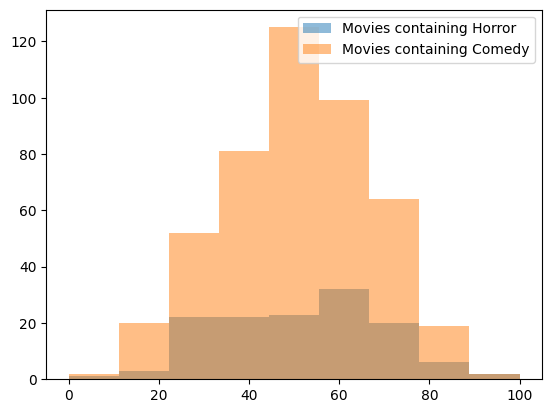

In [27]:
# Charting Movies containing Keywords 
# Credits to Professor Ted Spence

# Importing libraries needed for charting 
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter
import numpy

# Charting for keywords 'Horror' and 'Comedy' 
scores_horror = metacritic[metacritic['description'].str.contains("horror")].score
scores_comedy = metacritic[metacritic['description'].str.contains("comedy")].score

bins = numpy.linspace(0, 100, 10)
pyplot.hist(scores_horror, bins, alpha=0.5, label='Movies containing Horror')
pyplot.hist(scores_comedy, bins, alpha=0.5, label='Movies containing Comedy')
pyplot.legend(loc='upper right')
pyplot.show()

The data and graph above shows that movies with the descriptions containing the keyword 'Comedy' had a more normal distribution with minimum outliers. The movies with 'Horror' in their description had a slightly skewed distribution but also was much more flat between scores of 20 and 80. Also, minimum outliers on this data. 